In [2]:
!pip install statsmodels

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [4]:
t2_raw_df = pd.read_csv(r'C:\Users\cpelosi\OneDrive - Capgemini\Desktop\my_repos\case_study\raw_data\trans_transformed2.csv')
t1_raw_df = pd.read_csv(r'C:\Users\cpelosi\OneDrive - Capgemini\Desktop\my_repos\case_study\raw_data\trans_transformed1.csv')

In [5]:
t2_raw_df.rename(columns={'date': 'time'}, inplace=True)

In [6]:
x = t1_raw_df['amt'].values
y = []

y.append(x[0])
for i in range(1,len(x)):
    y.append(x[i]+y[i-1])
bilancio = pd.DataFrame(y)

bilancio = pd.DataFrame(y)
t2_raw_df['balance'] = bilancio

In [9]:
t2_raw_df.set_index("time", inplace=True)

t2_raw_df.index = pd.to_datetime(time.index)

KeyError: "None of ['time'] are in the columns"

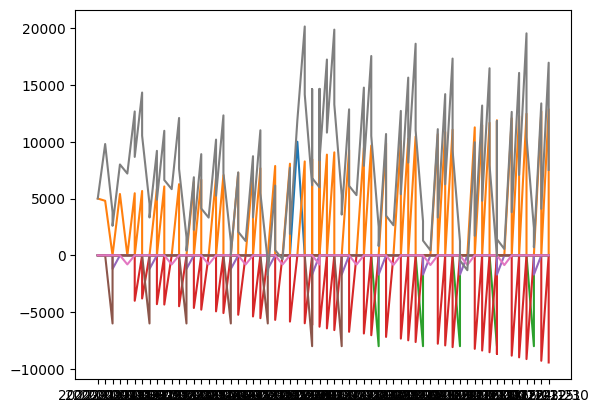

In [10]:
plt.plot(t2_raw_df, label="Dati reali")
plt.show()

loan_disbursement


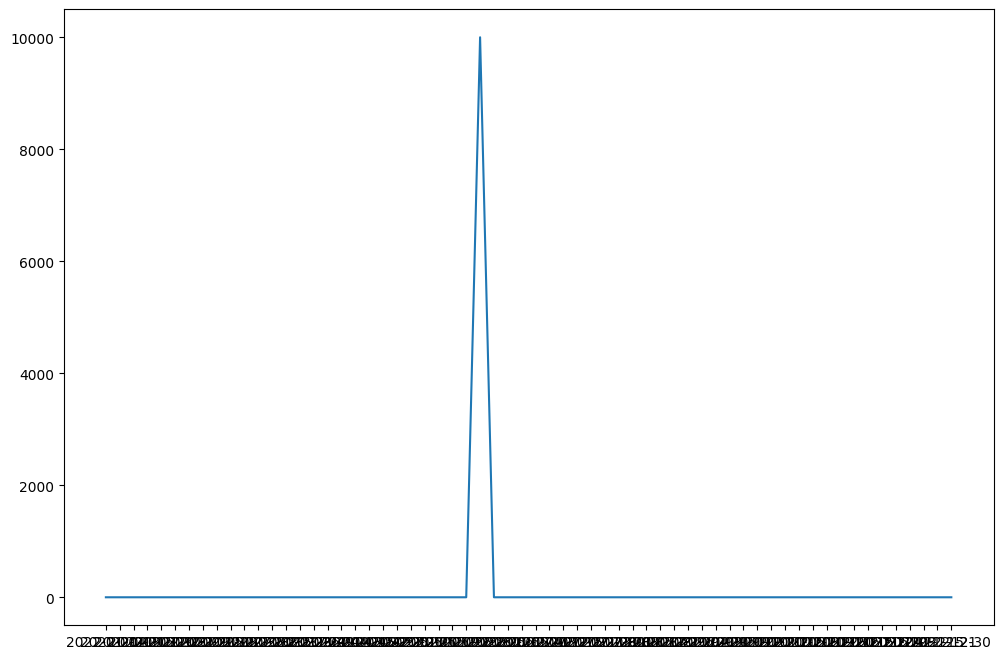

bill_incomes


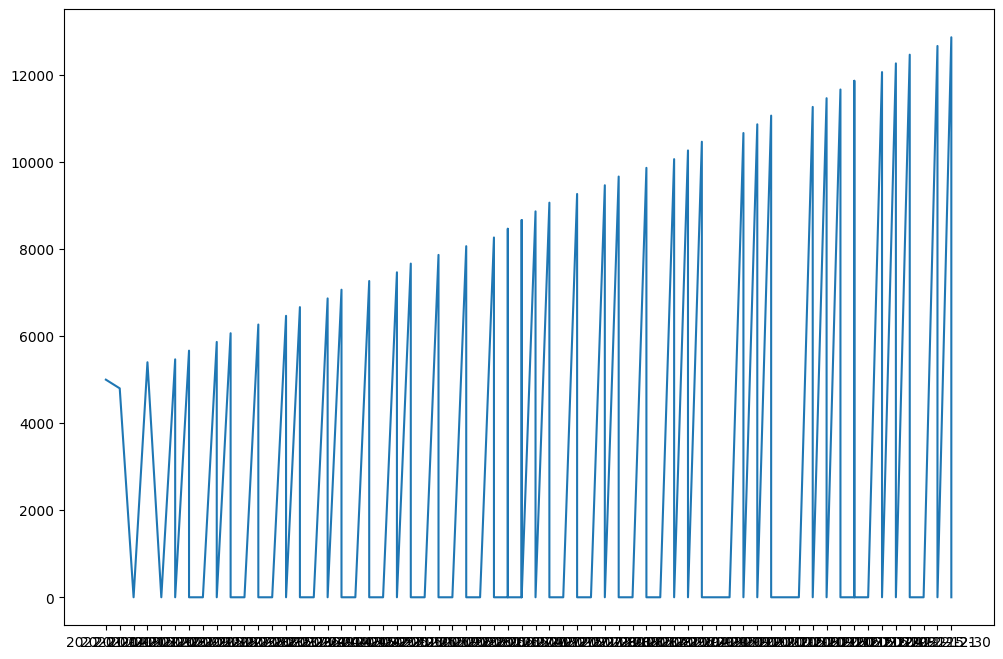

bill_outcomes


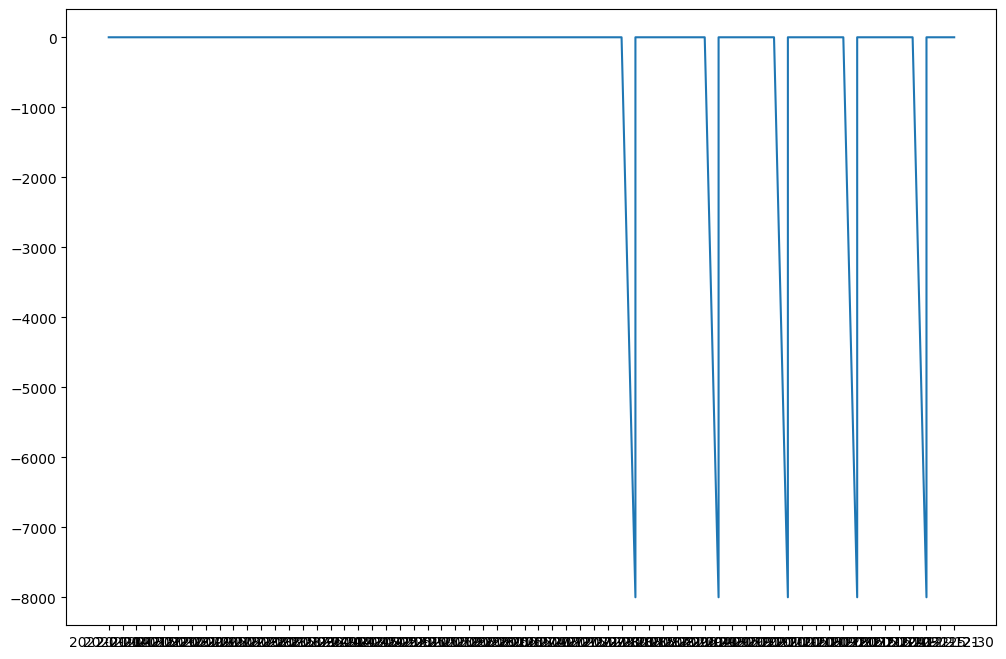

supplier_outcomes


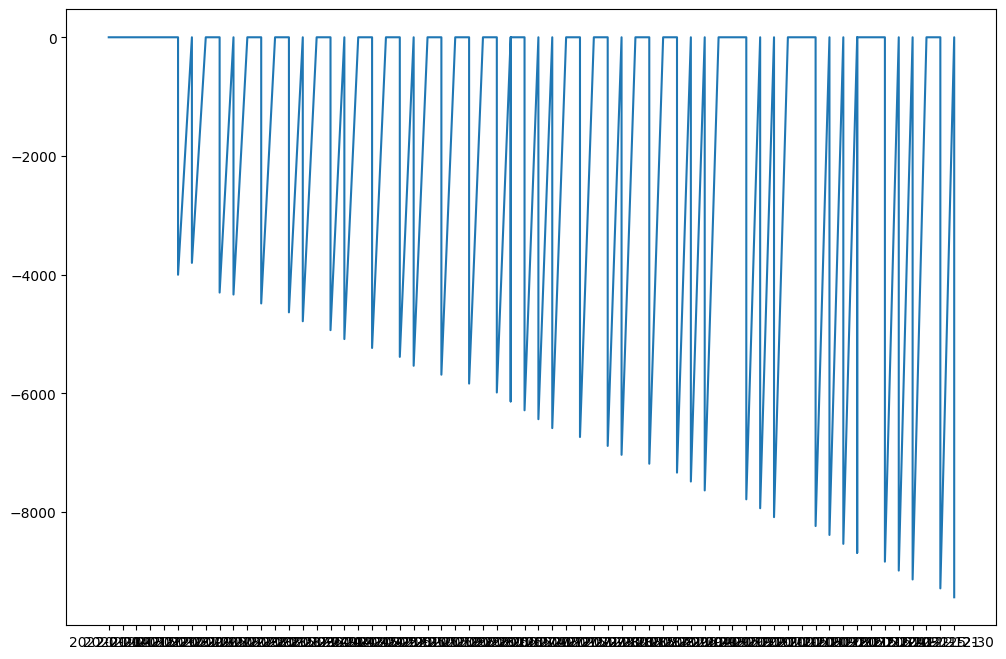

loan_repayments


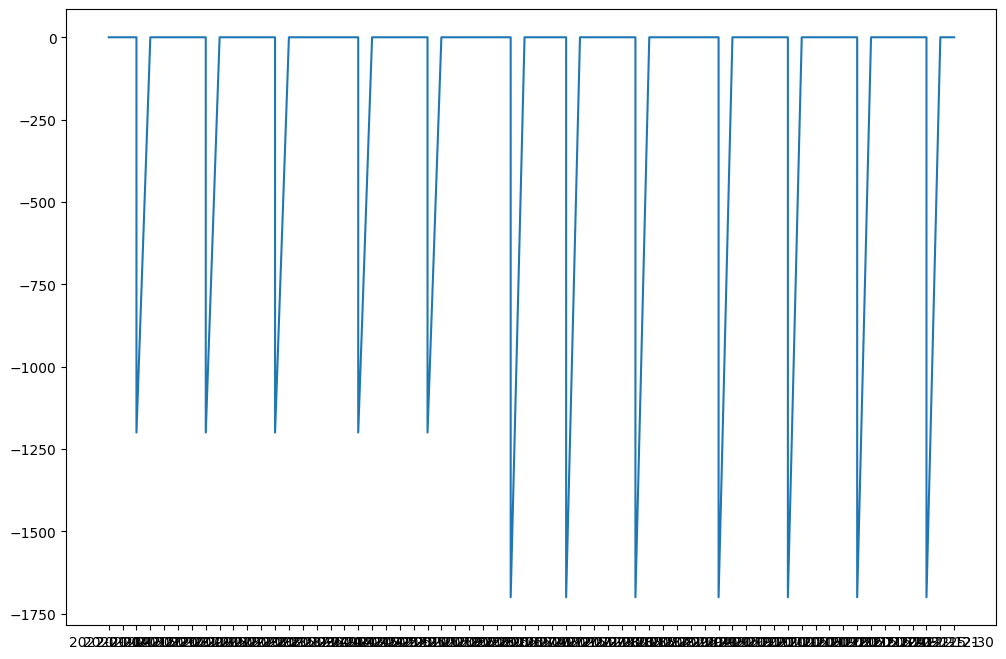

salaries


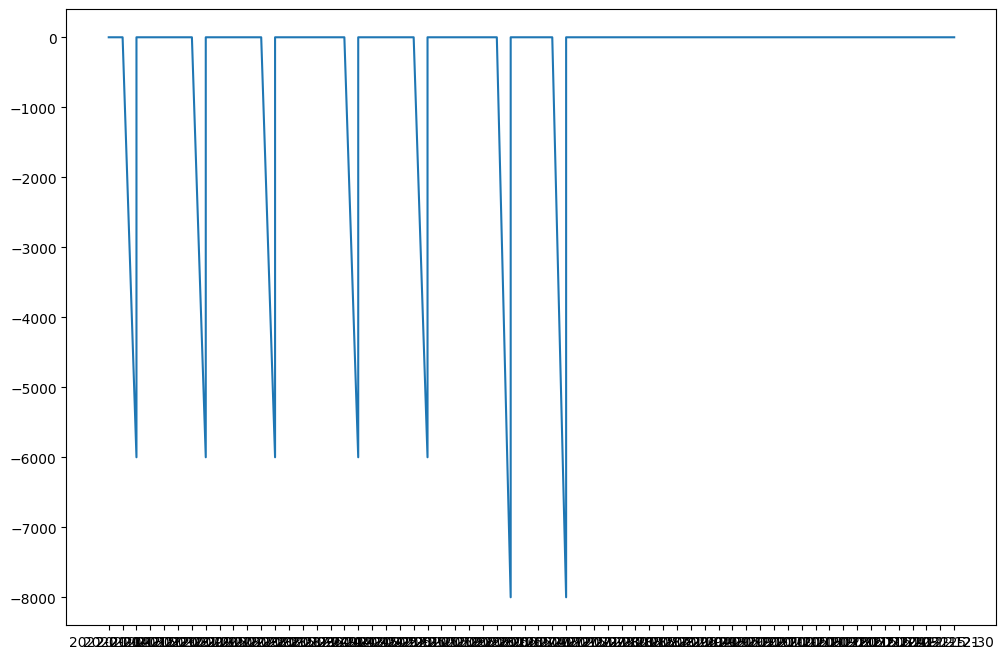

utilities


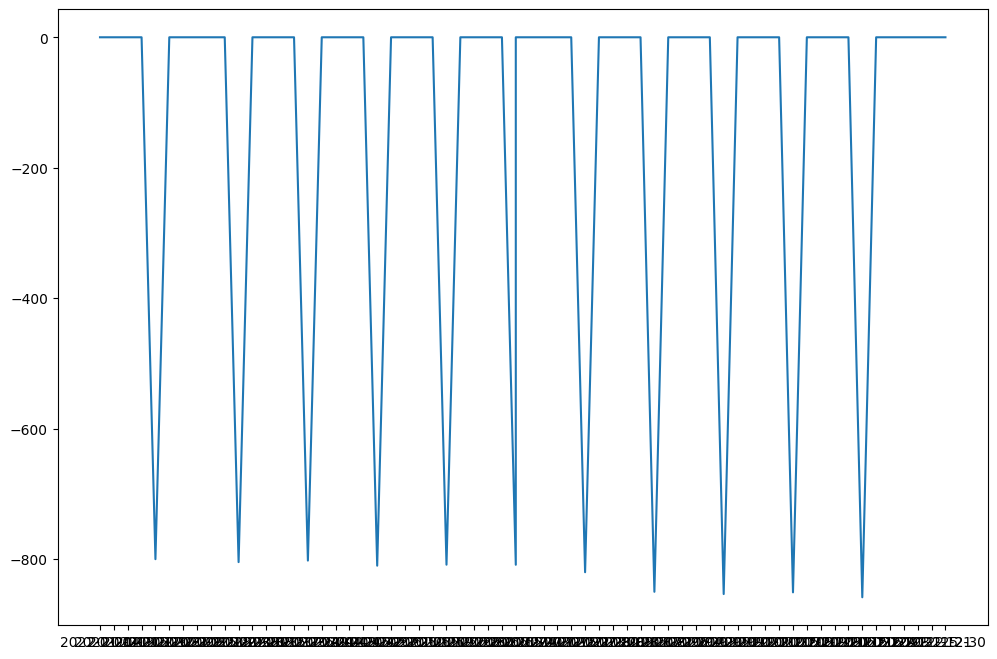

balance


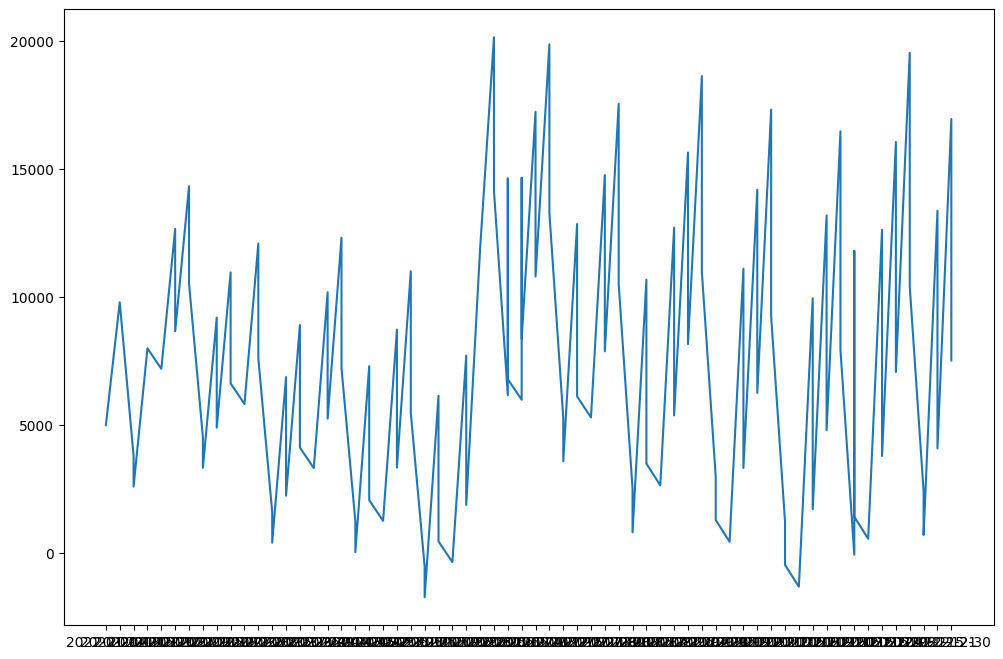

In [32]:
for col in t2_raw_df.columns:
    #plt.xlabel("time")
    print(col)
    plt.figure(figsize=(12,8))
    plt.plot(t2_raw_df[col])
    #plt.title(f'trend of {col}')
    #plt.xlabel('time')
    #plt.ylabel(col)
    #plt.title(f'trend of {col}')
    #plt.grid(True)
    plt.show()


In [ ]:
model = ARIMA(t2_raw_df.balance, order=(1,1,0))

C:\Users\cpelosi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\cpelosi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\cpelosi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

In [ ]:
model_fit = model.fit()

In [ ]:
predictions = model_fit.predict(start=len(t2_raw_df.balance), end=len(t2_raw_df.balance)+11, typ="levels") # predictions for the next 12 months
data_test = t2_raw_df.balance[-12:]
error = mean_squared_error(data_test, predictions) # calculate the mean squared error
print("MSE: ", error)


MSE:  34854332.37493099


C:\Users\cpelosi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [12]:
data = t2_raw_df['balance']

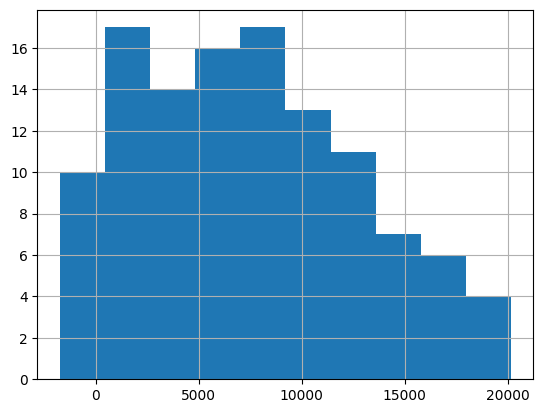

In [13]:
data.hist()
plt.show()

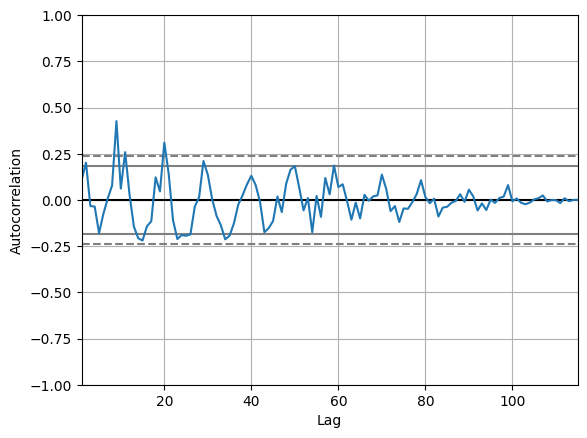

In [14]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data)
plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller

X = data

result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.187896
p-value: 0.210668
Critical Values:
	1%: -3.496
	5%: -2.890
	10%: -2.582


In [66]:
data_train = data[:100]
data_test = data[110:] 

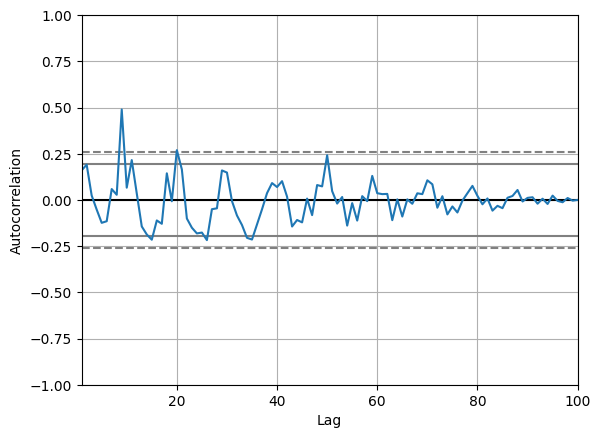

In [67]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data_train)
plt.show()

In [68]:
from statsmodels.tsa.stattools import adfuller

X = data_train

result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.200831
p-value: 0.205944
Critical Values:
	1%: -3.508
	5%: -2.895
	10%: -2.585


In [69]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [70]:
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [73]:
model1 = SimpleExpSmoothing(np.asarray(data_train)).fit(smoothing_level=0.9,optimized=False)

data_pred_sexosm = model1.forecast(len(data_test))
mean_absolute_percentage_error(data_test, data_pred_sexosm)


333.76976799667756

In [80]:
fit_holt = Holt(np.asarray(data_train)).fit(smoothing_level = 0.3,smoothing_slope = 0.3)

data_pred_holt = fit_holt.forecast(len(data_test))

mean_absolute_percentage_error(data_test, data_pred_holt)

C:\Users\cpelosi\AppData\Local\Temp\ipykernel_14112\2412996875.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit_holt = Holt(np.asarray(data_train)).fit(smoothing_level = 0.3,smoothing_slope = 0.3)


283.93208273580905

In [75]:
fit_holt_winter = ExponentialSmoothing(np.asarray(data_train) ,seasonal_periods=12 ,trend='add', seasonal='add',).fit()

data_pred_holt_w = fit_holt_winter.forecast(len(data_test))

mean_absolute_percentage_error(data_test, data_pred_holt_w)

C:\Users\cpelosi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


169.32572449924052